# Tanzianian water wells

## Business understanding

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

Build a classifier to predict the condition of a water well, using information about the sort of pump, when it was installed, etc. Your audience could be an NGO focused on locating wells needing repair, or the Government of Tanzania looking to find patterns in non-functional wells to influence how new wells are built. Note that this is a ternary classification problem by default, but can be engineered to be binary.

The ternary classifiation includes:

Functional wells

Functional and needs repair wells

Non-functional wells

amount_tsh : Total static head (amount water available to waterpoint)

date_recorded : The date the row was entered

funder : Who funded the well

gps_height : Altitude of the well

installer : Organization that installed the well

longitude : GPS coordinate

latitude : GPS coordinate

wpt_name : Name of the waterpoint if there is one

num_private :Private use or not

basin : Geographic water basin

subvillage : Geographic location

region : Geographic location

region_code : Geographic location (coded)

district_code : Geographic location (coded)

lga : Geographic location

ward : Geographic location

population : Population around the well

public_meeting : True/False

recorded_by : Group entering this row of data

scheme_management : Who operates the waterpoint

scheme_name : Who operates the waterpoint

permit : If the waterpoint is permitted

construction_year : Year the waterpoint was constructed

extraction_type : The kind of extraction the waterpoint uses

extraction_type_group : The kind of extraction the waterpoint uses

extraction_type_class : The kind of extraction the waterpoint uses

management : How the waterpoint is managed

management_group : How the waterpoint is managed

payment : What the water costs

payment_type : What the water costs

water_quality : The quality of the water

quality_group : The quality of the water

quantity : The quantity of water

quantity_group : The quantity of water

source : The source of the water

source_type : The source of the water

source_class : The source of the water

waterpoint_type : The kind of waterpoint

waterpoint_type_group : The kind of waterpoint

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

Build a classifier to predict the condition of a water well, using information about the sort of pump, when it was installed, etc. The audience is an NGO focused on locating wells needing repair, looking to find patterns in non-functional wells to influence how new wells are built. 
Note that this is a ternary classification problem by default, but can be engineered to be binary.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
test_df = pd.read_csv('test-set-values.csv')
tr_df = pd.read_csv('training-set-labels.csv')
trained_df = pd.read_csv('training-set-values.csv')

In [3]:
train_df = pd.merge(tr_df, trained_df, on='id')
train_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
test_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2/4/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2/4/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2/1/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,1/22/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,3/27/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2/24/2011,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,3/21/2011,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,3/4/2013,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2/18/2013,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


## Data Understanding

In [5]:
#Checking for the datas statistical description
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Checking at datatypes, number of entries and missing values in test dataset.

In [6]:
#Looking for dataset information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [7]:
#Checkin for null values in test dataset.
test_df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

Checking at datatypes, number of entries and missing values in train dataset.


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [9]:
#Checking for null values in train dataset
train_df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

The following columns has missing values in both test and train data sets
funder
installer
subvillage
public_meeting
recorded_by
scheme_management
scheme_name
permit

In [10]:
for column in train_df.columns:
     print("\n" + column)
     print(train_df[column].value_counts())


id
2047     1
72310    1
49805    1
51852    1
62091    1
        ..
46396    1
36155    1
34106    1
38200    1
0        1
Name: id, Length: 59400, dtype: int64

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

date_recorded
3/15/2011    572
3/17/2011    558
2/3/2013     546
3/14/2011    520
3/16/2011    513
            ... 
9/1/2011       1
9/15/2011      1
9/13/2011      1
8/31/2011      1
9/23/2011      1
Name: date_recorded, Length: 356, dtype: int64

funder
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                     

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

source_class
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


Noticed a few columns are similar:
scheme_management - management 

quantity - quantity_group

source- source_type 

water_quality - quality_group

payment - payment_type

extraction_type - extraction_type_group - extraction_type_class*

waterpoint_type - waterpoint_type_group

In [11]:
#Checking for duplicates in id column
train_df.duplicated(subset='id', keep='first').sum()

0

## Data exploration

In [12]:
train_df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [13]:
train_df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

The quantity and quantity_group column are similar we are going to drop one of the columns.

In [14]:
#Checking for similarities in source and source datatype
train_df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [15]:
#Checking for unique value
train_df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [16]:
#Check for unique values
train_df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [17]:
#Group our data based on different features
train_df.groupby(['source_class','source_type']).count() 

id  status_group  amount_tsh  \
source_class source_type                                             
groundwater  borehole              11949         11949       11949   
             shallow well          16824         16824       16824   
             spring                17021         17021       17021   
surface      dam                     656           656         656   
             rainwater harvesting   2295          2295        2295   
             river/lake            10377         10377       10377   
unknown      other                   278           278         278   

                                   date_recorded  funder  gps_height  \
source_class source_type                                               
groundwater  borehole                      11949   11120       11949   
             shallow well                  16824   16302       16824   
             spring                        17021   15870       17021   
surface      dam                             656     647         656   
             rainwater harvesting           2295    2099        2295   
             river/lake                    10377    9478       10377   
unknown      other                           278     249         278   

                                   installer  longitude  latitude  wpt_name  \
source_class source_type                                                      
groundwater  borehole                  11114      11949     11949     11949   
             shallow well              16286      16824     16824     16824   
             spring                    15870      17021     17021     17021   
surface      dam                         646        656       656       656   
             rainwater harvesting       2096       2295      2295      2295   
             river/lake                 9483      10377     10377     10377   
unknown      other                       250        278       278       278   

                                   ...  management_group  payment  \
source_class source_type           ...                              
groundwater  borehole              ...             11949    11949   
             shallow well          ...             16824    16824   
             spring                ...             17021    17021   
surface      dam                   ...               656      656   
             rainwater harvesting  ...              2295     2295   
             river/lake            ...             10377    10377   
unknown      other                 ...               278      278   

                                   payment_type  water_quality  quality_group  \
source_class source_type                                                        
groundwater  borehole                     11949          11949          11949   
             shallow well                 16824          16824          16824   
             spring                       17021          17021          17021   
surface      dam                            656            656            656   
             rainwater harvesting          2295           2295           2295   
             river/lake                   10377          10377          10377   
unknown      other                          278            278            278   

                                   quantity  quantity_group  source  \
source_class source_type                                              
groundwater  borehole                 11949           11949   11949   
             shallow well             16824           16824   16824   
             spring                   17021           17021   17021   
surface      dam                        656             656     656   
             rainwater harvesting      2295            2295    2295   
             river/lake               10377           10377   10377   
unknown      other                      278             278     278   

                                   waterpoint_type  wa

The source_type is more descriptives than source so we are going to drop the source_type. 

In [18]:
train_df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [19]:
train_df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Quality_group is not that detailed like water_quality so we will drop quality_group.

Looking at scheme_management, management, management_group columns

In [20]:
train_df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [21]:
train_df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [22]:
train_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [23]:
#sub-groups of management column are in management group
train_df.groupby(['management_group','management']).count()

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     663         685   
                 private operator           1971    1957        1971   
                 trust                        78      78          78   
                 water authority             904     836         904   
other            other                       844     837         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1624        1768   
unknown          unknown                     561     533         561   
user-group       vwc                       40507   37632       40507   
                 water board                2933    2715        2933   
                 wua                        2535    2308        2535   
                 wug                        6515    6483        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 663        685       685       685   
                 private operator       1959       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         836        904       904       904   
other            other                   831        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1626       1768      1768      1768   
unknown          unknown                 527        561       561       561   
user-group       vwc                   37630      40507     40507     40507   
                 water board            2714       2933      2933      2933   
                 wua                    2309       2535      2535      2535   
                 wug                    6473       6515      6515      6515   

                                   ...  payment_type  water_quality  \
management_group management        ...                                
commercial       company           ...           685            685   
                 private operator  ...          1971           1971   
                 trust             ...            78             78   
                 water authority   ...           904            904   
other            other             ...           844            844   
                 other - school    ...            99             99   
parastatal       parastatal        ...          1768           1768   
unknown          unknown           ...           561            561   
user-group       vwc               ...         40507          40507   
                 water board       ...          2933           2933   
                 wua               ...          2535           2535   
                 w

The management column is almost similar to scheme_management. The management group groups the management into groups.

In [24]:
train_df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [25]:
train_df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

The payment and payment_type are the same though they have different naming.

In [26]:
train_df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [27]:
train_df.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [28]:
train_df.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [29]:
#Grouping extracting _type_class and extraction_type together
train_df.groupby(['extraction_type_class','extraction_type']).count()

id  status_group  \
extraction_type_class extraction_type                                  
gravity               gravity                    26780         26780   
handpump              afridev                     1770          1770   
                      india mark ii               2400          2400   
                      india mark iii                98            98   
                      nira/tanira                 8154          8154   
                      other - mkulima/shinyanga      2             2   
                      other - play pump             85            85   
                      other - swn 81               229           229   
                      swn 80                      3670          3670   
                      walimi                        48            48   
motorpump             cemo                          90            90   
                      climax                        32            32   
                      mono                        2865          2865   
other                 other                       6430          6430   
rope pump             other - rope pump            451           451   
submersible           ksb                         1415          1415   
                      submersible                 4764          4764   
wind-powered          windmill                     117           117   

                                                 amount_tsh  date_recorded  \
extraction_type_class extraction_type                                        
gravity               gravity                         26780          26780   
handpump              afridev                          1770           1770   
                      india mark ii                    2400           2400   
                      india mark iii                     98             98   
                      nira/tanira                      8154           8154   
                      other - mkulima/shinyanga           2              2   
                      other - play pump                  85             85   
                      other - swn 81                    229            229   
                      swn 80                           3670           3670   
                      walimi                             48             48   
motorpump             cemo                               90             90   
                      climax                             32             32   
                      mono                             2865           2865   
other                 other                            6430           6430   
rope pump             other - rope pump                 451            451   
submersible           ksb                              1415           1415   
                      submersible                      4764           4764   
wind-powered          windmill                          117            117   

                                                 funder  gps_height  \
extraction_type_class extraction_type                                 
gravity               gravity                     24704       26780   
handpump              afridev                      1668        1770   
                      india mark ii                2358        2400   
                      india mark iii                 98          98   
                      nira/tanira                  7899        8154   
                      other - mkulima/shinyanga       1           2   
                      other - play pump              85          85   
                      other - swn 81                219         229   
                      swn 80                       3596        3670   
                      walimi                         48          48   
motorpump             cemo                           90          90   
                      climax                         32          32   
                      mono                         2577 

Extraction_type_class is grouping the extraction_type into group. Extraction_type and extraction_type_group are similar.

In [30]:
#Checking the number of different values
train_df.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [31]:
#Checking at value count for waterpoint
train_df.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

The waterpoint_type_group,waterpoint_type are similar so we will drop the waterpoint_type_group.

In [32]:
#Drop columns that are similar in train dataset
train_df.drop(columns=['extraction_type_group','management','waterpoint_type_group','quantity_group','source_type',
                'payment_type'],inplace=True )

In [33]:
train_df.duplicated().sum()

0

In [34]:
#Drop columns that are similar in test dataset
test_df. drop(columns=['extraction_type_group','management','waterpoint_type_group','quantity_group','source_type',
                'payment_type'],inplace=True)

## Cleaning data

In [35]:
train_df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_class        0
management_group             0
payment                      0
water_quality                0
quality_group                0
quantity                     0
source  

In [36]:
train_df['funder'].value_counts()

Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                           ... 
Ncs                           1
Sido                          1
Area                          1
Tag Church Ub                 1
Dwe/ubalozi Wa Marekani       1
Name: funder, Length: 1897, dtype: int64

In [37]:
#Checking for null values
train_df['funder'].isnull().sum()

3635

In [38]:
#filling null values in installer with data from funder
train_df['installer'].fillna(train_df['funder'], inplace=True)
#filling null values in funder with data from installer
train_df['funder'].fillna(train_df['installer'], inplace=True)

In [39]:
#filling the NaN values in the funder column with Not_provided
train_df['installer'].fillna("Not_provided",inplace =True)
train_df['funder'].fillna("not_provided",inplace =True)

Filling null values in test data

In [40]:
#filling null values in installer with data from funder
test_df['installer'].fillna(train_df['funder'], inplace=True)
#filling null values in funder with data from installer
test_df['funder'].fillna(train_df['installer'], inplace=True)

In [41]:
#filling the NaN values in the funder column with Not_provided
test_df['installer'].fillna("Not_provided",inplace =True)
test_df['funder'].fillna("not_provided",inplace =True)

In [42]:
#checking at population column
train_df['population'].value_counts().head(5)

0      21381
1       7025
200     1940
150     1892
250     1681
Name: population, dtype: int64

In [43]:
# population summary statistics
train_df.loc[train_df['population']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,37107.559115,447.787681,969.889634,36.074387,-6.139781,0.740788,16.076988,6.299456,281.087167,1961.399721
std,21406.803661,3706.770967,612.544787,2.586779,2.737733,15.288297,21.597996,11.303334,564.687660,263.994165
min,1.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,1.000000,0.000000
25%,18514.500000,0.000000,347.000000,34.715340,-8.388839,0.000000,4.000000,2.000000,40.000000,1986.000000
50%,37128.000000,0.000000,1135.000000,36.706815,-5.750877,0.000000,10.000000,3.000000,150.000000,2000.000000
75%,55505.500000,100.000000,1465.000000,37.940149,-3.597016,0.000000,16.000000,5.000000,324.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,67.000000,30500.000000,2013.000000


In [44]:
# replacing the zeros with mean of 281
train_df['population'].replace(to_replace = 0 , value =281, inplace=True)

In [45]:
# replacing the zeros with mean of 281 in test data
test_df['population'].replace(to_replace = 0 , value =281, inplace=True)

In [46]:
#looking at num_private
train_df['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [47]:
train_df['num_private'].describe()*100

count    5.940000e+06
mean     4.741414e+01
std      1.223623e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.776000e+05
Name: num_private, dtype: float64

Most values in num_private are zero hence drop the column
Most of the well are public properties

In [48]:
#dropping num_private
train_df.drop(columns=['num_private'],inplace=True )

In [49]:
##dropping num_private in test data
test_df.drop(columns=['num_private'],inplace=True )

In [50]:
#Checking for null values in subvillage column
train_df['subvillage'].value_counts()

Madukani            508
Shuleni             506
Majengo             502
Kati                373
Mtakuja             262
                   ... 
Kibuli                1
Nyasirori             1
Sukuma Magharibi      1
Mawiwi                1
Mbogwe Kati           1
Name: subvillage, Length: 19287, dtype: int64

In [51]:
#Checking how many missing values
train_df['subvillage'].isnull().sum()

371

In [52]:
#Filling null with uknown in train data
train_df['subvillage'].fillna('unknown', inplace = True)

In [53]:
#Filling null with uknown in test data
test_df['subvillage'].fillna('unknown', inplace = True)

In [54]:
#Checking for missing value in public_meeting
train_df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [55]:
train_df['public_meeting'].isnull().sum()

3334

In [56]:
#Filling null with uknown in train data
train_df['public_meeting'].fillna('unknown', inplace = True)

In [57]:
test_df['public_meeting'].fillna('unknown', inplace = True)

In [58]:
#Checking for null values
train_df['scheme_name'].value_counts()

K                         682
None                      644
Borehole                  546
Chalinze wate             405
M                         400
                         ... 
Ntang'whale                 1
DMK                         1
Mradi wa maji wa  Wino      1
Kwenangwa water supp        1
Kilimi and Uchama dam       1
Name: scheme_name, Length: 2696, dtype: int64

In [59]:
train_df['scheme_name'].isnull().sum()

28166

In [60]:
#Filling null values with None 
train_df['scheme_name'].fillna('None', inplace = True)

In [61]:
test_df['scheme_name'].fillna('None', inplace = True)

In [62]:
train_df['construction_year'].value_counts().head(5)

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64

In [63]:
#Checking the median of construction_year
train_df.loc[train_df['construction_year']!=0].median() 

id                   37078.000000
amount_tsh               0.000000
gps_height            1154.000000
longitude               36.648187
latitude                -6.064216
region_code             11.000000
district_code            3.000000
population             150.000000
permit                   1.000000
construction_year     2000.000000
dtype: float64

In [64]:
#Filling 0 values with the median
train_df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [65]:
#bin the years into categories
train_df['construction_year_bins'] = pd.cut(x=train_df['construction_year'], bins=[1950, 1960, 1970,1980,1990,1995, 2000,2005, 2010, 2015])

Text(0.5, 1.0, 'Functionality of wells built in different years')

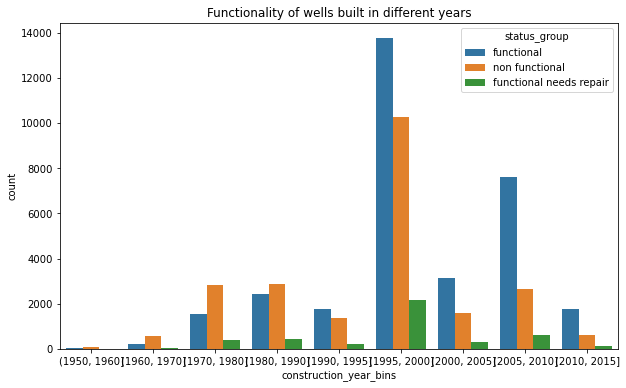

In [66]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='construction_year_bins', hue="status_group", data=train_df)
plt.title('Functionality of wells built in different years')

In [67]:
#Drop construction_year column
train_df.drop(columns =['construction_year'], inplace = True)

In [68]:
#Drop construction_year column in test
test_df.drop(columns =['construction_year'], inplace = True)

Text(0.5, 1.0, 'Functionality of wells built in from different source')

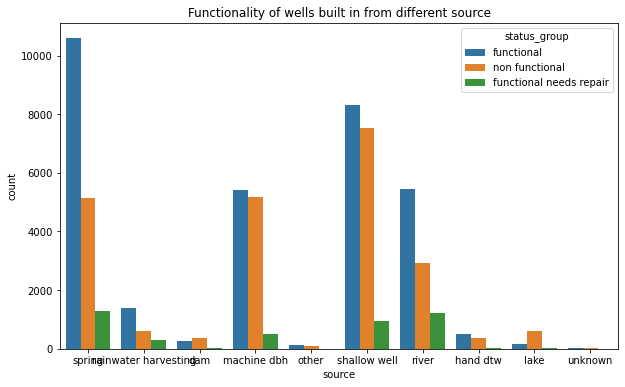

In [69]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='source', hue="status_group", data=train_df)
plt.title('Functionality of wells built in from different source')

In [70]:
#Checking date recorded
train_df['date_recorded'].value_counts()

3/15/2011    572
3/17/2011    558
2/3/2013     546
3/14/2011    520
3/16/2011    513
            ... 
9/1/2011       1
9/15/2011      1
9/13/2011      1
8/31/2011      1
9/23/2011      1
Name: date_recorded, Length: 356, dtype: int64

In [71]:
#dropping date column
train_df.drop(columns = ['date_recorded'], inplace = True)

In [72]:
#dropping date column in test
test_df.drop(columns = ['date_recorded'], inplace = True)

Decided to drop the date_recorded because they mostly happened between 2000 to 2011

In [73]:
#Checking on amount_tsh column
train_df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [74]:
#Dropping on amount_tsh column
train_df.drop(columns=['amount_tsh'],inplace=True )

In [75]:
#Checking for null values
train_df['scheme_management'].isnull().sum()

3877

In [76]:
#checking for null values
train_df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [77]:
#filling null values with none
train_df['scheme_management'].fillna('None', inplace= True)

In [78]:
test_df['scheme_management'].fillna('None', inplace= True)

In [79]:
#Looking at record_by column
train_df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [80]:
#dropping the column since its only has one value hence unnecessary 
train_df.drop(columns=['recorded_by'],inplace=True )

In [81]:
#Dropping record_by column in test data
test_df.drop(columns=['recorded_by'],inplace=True )

In [82]:
#Checking for null values
test_df['permit'].value_counts()

True     9754
False    4359
Name: permit, dtype: int64

In [83]:
#Filling null values with unknown
test_df['permit'].fillna('Unknown', inplace= True)

In [84]:
train_df['permit'].fillna('Unknown', inplace= True)

In [85]:
train_df['longitude'].value_counts()

0.000000     1812
37.534327       2
37.538602       2
37.318911       2
37.540901       2
             ... 
34.672962       1
39.433604       1
35.901580       1
37.532216       1
33.292860       1
Name: longitude, Length: 57516, dtype: int64

In [86]:
# summary statistics of the dataframe to check for the mean of the longitude column
train_df.loc[train_df['longitude']!=0].describe() 

,id,gps_height,longitude,latitude,region_code,district_code,population
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,689.325137,35.149669,-5.885572,15.217615,5.728311,281.057547
std,21454.51421,693.564188,2.607428,2.809876,17.855254,9.760254,458.818272
min,0.00000,-90.000000,29.607122,-11.649440,1.000000,0.000000,1.000000
25%,18522.75000,0.000000,33.285100,-8.643841,5.000000,2.000000,90.000000
50%,37054.50000,426.000000,35.005943,-5.172704,12.000000,3.000000,281.000000
75%,55667.25000,1332.000000,37.233712,-3.372824,17.000000,5.000000,281.000000
max,74247.00000,2770.000000,40.345193,-0.998464,99.000000,80.000000,30500.000000


In [87]:
#replacing the zeroes with mean
train_df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

### converting boolean type column to 0 and 1

In [88]:
#convert True/False in permit column to 0 and 1
train_df['permit'] =train_df['permit'].astype(bool).astype(int) 

#convert True/False in public meeting column to 0 and 1
train_df['public_meeting'] = train_df['public_meeting'].astype(bool).astype(int)


In [89]:
#Checking how ward and lga column relate
df1 = train_df.iloc[:, 16:18]
train_df.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [90]:
# numerical columns
numerical_var = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [91]:
# categorical columns  
categorical_var = ['basin','region','extraction_type','management_group','payment','quality_group','quantity',
               'source','waterpoint_type','construction_year_bins']

In [92]:
#drop ward columns because it is showing the geographical locations while 
#we have lga column with same information
train_df.drop(columns=['ward'],inplace=True ) 

In [93]:
#Converting target variable to numerical variables
target_var = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
train_df['status_group'] = train_df['status_group'].replace(target_var)

train_df['status_group'].value_counts()



0    32259
2    22824
1     4317
Name: status_group, dtype: int64



   0 = functional water points 

   2 = non-functinal water point

   1 = functional but needs repair water points



In [94]:
#changing from True/False to 0-1
#convert True/False in public meeting column to 0-1
train_df['public_meeting'] = train_df['public_meeting'].astype(bool).astype(int)
#convert True/False in permit column to 0-1(boolean to int)
train_df['permit'] =train_df['permit'].astype(bool).astype(int) 

In [95]:
#ID does not help in modelling
train_df.drop(columns = ['id'], inplace = True)

## Exploratory Data Analysis


Text(0.5, 1.0, 'Different types of water well')

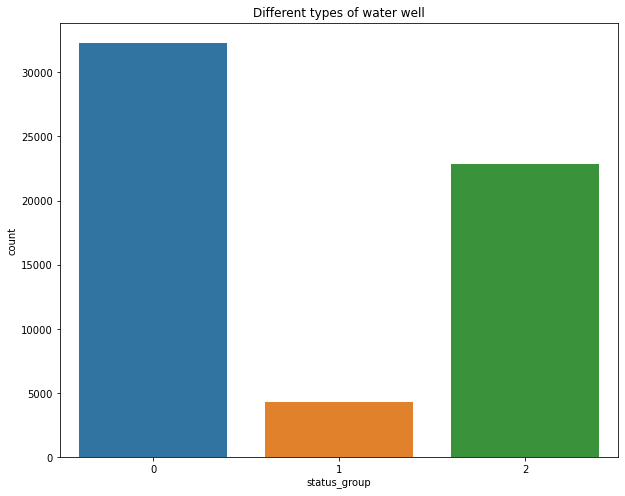

In [96]:
#Visualizing status group
plt.figure(figsize = (10,8))
ax = sns.countplot(x='status_group', data=train_df)
plt.title('Different types of water well')

In [97]:
cat_df = [train_df['basin'],train_df['quality_group'],train_df['management_group']]

In [98]:
#extraction_type,source,quality_group,management_group,region     
#list of column index and column names
list(enumerate(train_df))
df_l =  [train_df['management_group'],train_df['payment'],train_df['quality_group'],train_df['quantity'],
train_df['source'],train_df['waterpoint_type'],train_df['basin']]

<AxesSubplot:xlabel='status_group', ylabel='population'>

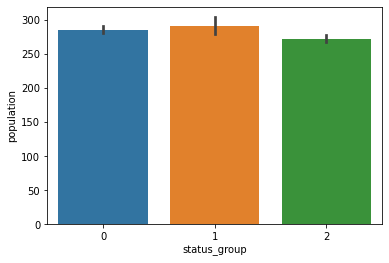

In [99]:
sns.barplot(y='population',x ='status_group',data=train_df)

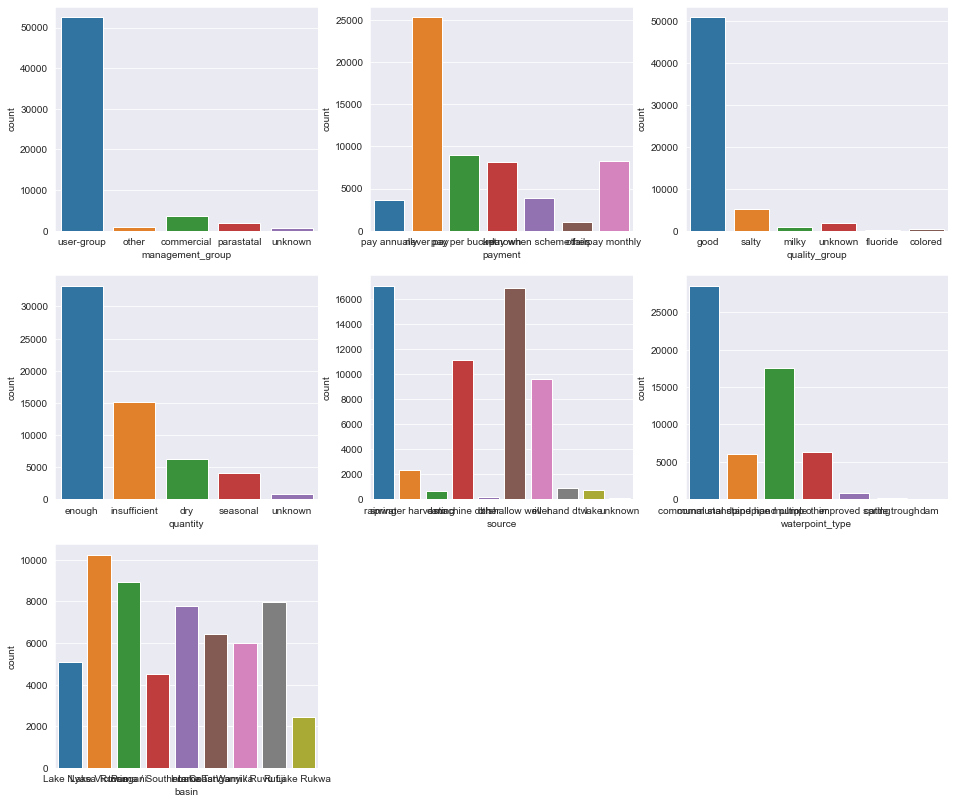

In [100]:
#univariate analysis
sns.set_style('darkgrid')
plt.figure(figsize=(16,14))
for i in enumerate(df_l):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(i[1])

Text(0.5, 1.0, 'Region with and without water wells')

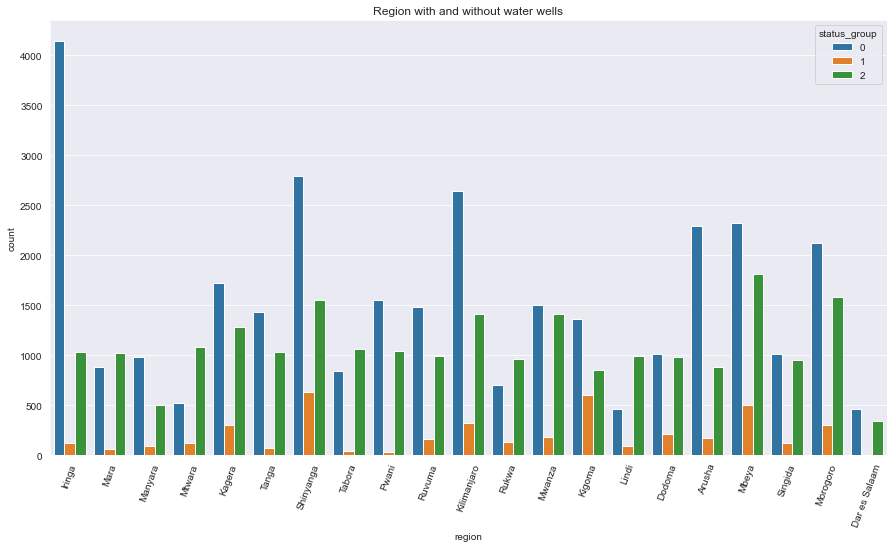

In [101]:
#visualizing region column
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
ax = sns.countplot(x='region', hue="status_group", data=train_df)
plt.title('Region with and without water wells')

Text(0.5, 1.0, 'Functionality of wells vs quantity')

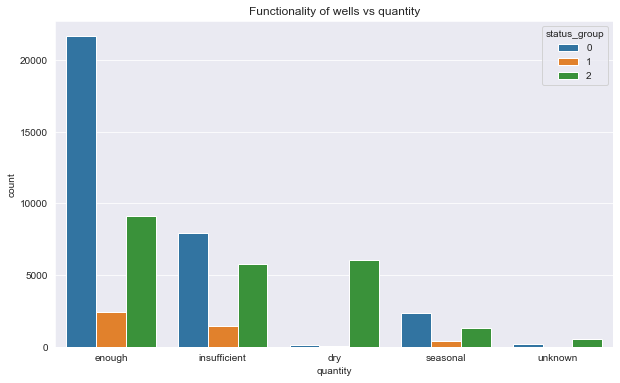

In [102]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='quantity', hue="status_group", data=train_df)
plt.title('Functionality of wells vs quantity')

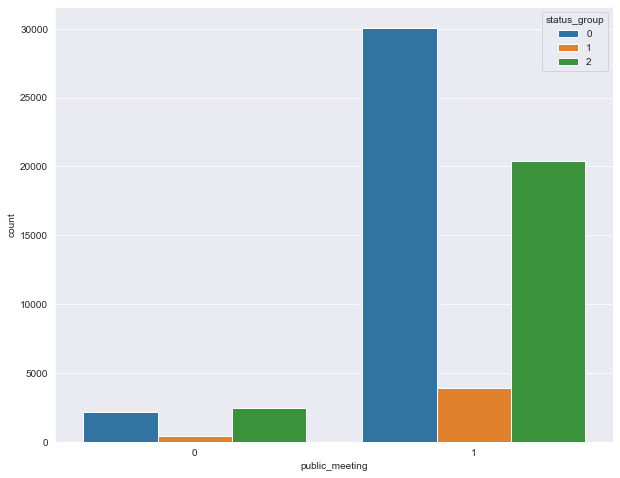

In [103]:
plt.figure(figsize = (10,8))
ax = sns.countplot(x='public_meeting',hue = 'status_group' ,data=train_df)

Text(0.5, 1.0, 'Water well functions with different managements')

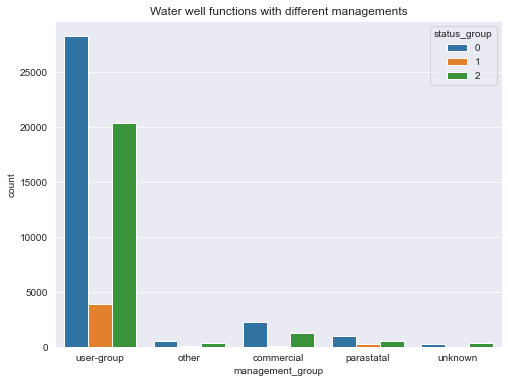

In [104]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='management_group', hue="status_group", data=train_df)
plt.title('Water well functions with different managements')

### Data Preprocessing for the model.

In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   status_group            59400 non-null  int64   
 1   funder                  59400 non-null  object  
 2   gps_height              59400 non-null  int64   
 3   installer               59400 non-null  object  
 4   longitude               59400 non-null  float64 
 5   latitude                59400 non-null  float64 
 6   wpt_name                59400 non-null  object  
 7   basin                   59400 non-null  object  
 8   subvillage              59400 non-null  object  
 9   region                  59400 non-null  object  
 10  region_code             59400 non-null  int64   
 11  district_code           59400 non-null  int64   
 12  lga                     59400 non-null  object  
 13  population              59400 non-null  int64   
 14  public_meeting        

columns to drop

In [106]:
train_df.drop(columns = ['scheme_management','subvillage','installer','quality_group','source_class','extraction_type_class','lga','payment','extraction_type_class','scheme_name','funder',

'region_code','wpt_name'],inplace = True )

Some columns needs to be dropped since they have similar information with other columns

In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   status_group            59400 non-null  int64   
 1   gps_height              59400 non-null  int64   
 2   longitude               59400 non-null  float64 
 3   latitude                59400 non-null  float64 
 4   basin                   59400 non-null  object  
 5   region                  59400 non-null  object  
 6   district_code           59400 non-null  int64   
 7   population              59400 non-null  int64   
 8   public_meeting          59400 non-null  int32   
 9   permit                  59400 non-null  int32   
 10  extraction_type         59400 non-null  object  
 11  management_group        59400 non-null  object  
 12  water_quality           59400 non-null  object  
 13  quantity                59400 non-null  object  
 14  source                

Lets convert the target variable into binary. 

In [108]:
# convert ternary classes to binary class
status_group_dict = {0:1, 1: 1, 2 : 0}
train_df['status_group'] = train_df['status_group'].replace(status_group_dict )

#status group value count
train_df['status_group'].value_counts()

1    36576
0    22824
Name: status_group, dtype: int64

The code above Just combined functional water points wih functional waterpoints that need repair into one variable as 1 and the non-functional variable into 0


## modeling

To find the best model, firstly we will try to simplify our problem. In this notebook, different modeling techniques can be found. We will use different encoder, scaler , classifier and try different models.I simplfy the model by merging functional and functional but needs repair target labels, and assign this to target as done in the above code. Then, we will assign non-functional to 0. First, we will try simple model then we will try to improve it.

Dividing the data into x(predictive_features) and y(target feature)

In [109]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
import category_encoders as ce
from sklearn.metrics import classification_report
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

I will make two lists, one for categorical data and another for numerical data. I will perform scaling using MinMaxscaleron the numerical and encode the categorical with OneHotencoder.

In [110]:
train_df.columns

Index(['status_group', 'gps_height', 'longitude', 'latitude', 'basin',
       'region', 'district_code', 'population', 'public_meeting', 'permit',
       'extraction_type', 'management_group', 'water_quality', 'quantity',
       'source', 'waterpoint_type', 'construction_year_bins'],
      dtype='object')

In [111]:
# create the target and predictor variable
y = train_df['status_group']
X = train_df.drop('status_group', axis=1)


Split data into train and test

In [112]:
# to divide our X and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### creating a pipeline

I will create a pipe to simply data scaling and encoding for the various models that i will use.

In [113]:
# Transform numeric features to categories using a scaler
numeric_features=X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',RobustScaler())])
# Transform categorical features to numeric using an encoder
categorical_features=X_train.select_dtypes(include=['object','category']).columns
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])
# getting together our scaler and encoder with preprocessor
preprocessor=ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)])

# FIRST MODEL

##  Logistic Regression Model 

In [114]:
#making the pipeline
logrig = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight = 'balanced',
                                                        solver = 'saga', 
                                                        random_state=42))])
# fit the model
logrig.fit(X_train, y_train)

# make predictions on training data
y_pred = logrig.predict(X_train)

# make predictions on test data
y_pred_test = logrig.predict(X_test)

print("Accuracy:")
print(f"train is {accuracy_score(y_train, y_pred)}")
print(f"test is {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"train is {balanced_accuracy_score(y_train, y_pred)}")
print(f"test is {balanced_accuracy_score(y_test, y_pred_test)}")



Accuracy:
train is 0.7689273689273689
test is 0.771324354657688

Balanced Accuracy:
train is 0.7475446433635551
test is 0.7491064315487146


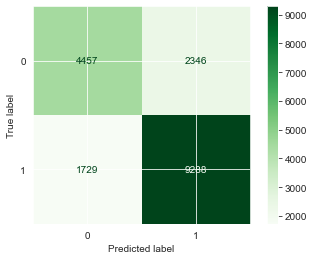

In [115]:
#plot_confusion_matrix

plot_confusion_matrix(logrig, X_test, y_test ,cmap='Greens')  
plt.show()

## second model 

### parameter tuning

I will change the parameters of the model from `'saga'`to `'liblinear'`.

In [116]:
#making the pipeline
logrig = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight = 'balanced',
                                                        solver = 'liblinear', 
                                                        penalty = 'l1',
                                                        random_state=42))])
# fit the model
logrig.fit(X_train, y_train)

# make predictions on training data
y_pred = logrig.predict(X_train)

# make predictions on test data
y_pred_test = logrig.predict(X_test)

print("Accuracy:")
print(f"train is: {accuracy_score(y_train, y_pred)}")
print(f"Test is: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"Train is: {balanced_accuracy_score(y_train, y_pred)}")
print(f"test is: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
train is: 0.7705627705627706
Test is: 0.7730078563411896

Balanced Accuracy:
Train is: 0.7489797169678352
test is: 0.750777202114018


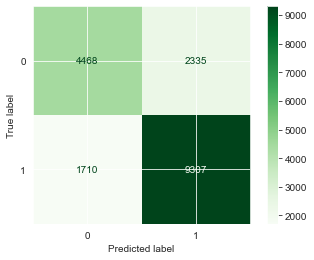

In [117]:

#plot_confusion_matrix
plot_confusion_matrix(logrig, X_test, y_test,cmap='Greens')  
plt.show()


In [118]:
scores = cross_val_score(logrig, X, y, cv=5, scoring='roc_auc')
print(scores.mean())

0.8245217868063615


In [119]:
print (classification_report(y_test,y_pred_test, labels = list(set(y_test)),target_names =['non-functional','functional']))

                precision    recall  f1-score   support

non-functional       0.72      0.66      0.69      6803
    functional       0.80      0.84      0.82     11017

      accuracy                           0.77     17820
     macro avg       0.76      0.75      0.75     17820
  weighted avg       0.77      0.77      0.77     17820



## Third model

### Decision Trees

In [120]:
dec_t = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini', 
                                                            min_samples_leaf = 20,
                                                            max_depth=14,
                                                            random_state=42,
                                                            max_features = None,
                                                            ))])
# fit the model
dec_t.fit(X_train, y_train) 
 
# make predictions on training data
y_pred = dec_t.predict(X_train)

# make predictions on test data
y_pred_test = dec_t.predict(X_test)

print("Accuracy:")
print(f"Train is: {accuracy_score(y_train, y_pred)}")
print(f"Test is: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"Train is {balanced_accuracy_score(y_train, y_pred)}")
print(f"Test is {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
Train is: 0.817989417989418
Test is: 0.8029180695847362

Balanced Accuracy:
Train is 0.7863808338980262
Test is 0.7685855346482486


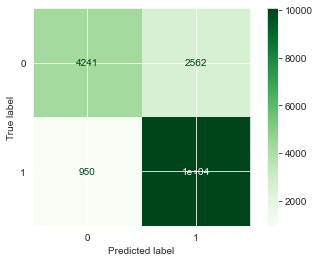

In [121]:
#plot_confusion_matrix
plot_confusion_matrix(dec_t, X_test, y_test,cmap='Greens')  
plt.show()


In [122]:
scores = cross_val_score(dec_t, X, y, cv=5, scoring='roc_auc')
print(scores.mean())

0.8608036539839506


In [123]:
print (classification_report(y_test,y_pred_test, labels = list(set(y_test)),target_names =['non-functional','functional']))

                precision    recall  f1-score   support

non-functional       0.82      0.62      0.71      6803
    functional       0.80      0.91      0.85     11017

      accuracy                           0.80     17820
     macro avg       0.81      0.77      0.78     17820
  weighted avg       0.80      0.80      0.80     17820



## Fourth model

### Random forest

In [124]:

rand_f = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100,
                                                            random_state=42, 
                                                            n_jobs=-1,
                                                            class_weight='balanced'))])
# fit the model
rand_f.fit(X_train, y_train) 
 
# make predictions on training data
y_pred = rand_f.predict(X_train)

# make predictions on test data
y_pred_test = rand_f.predict(X_test)

print("Accuracy:")
print(f"Train is: {accuracy_score(y_train, y_pred)}")
print(f"Test is: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"Train is: {balanced_accuracy_score(y_train, y_pred)}")
print(f"Test is: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
Train is: 0.9982924482924483
Test is: 0.8508978675645342

Balanced Accuracy:
Train is: 0.998156844930379
Test is: 0.8336182395064056


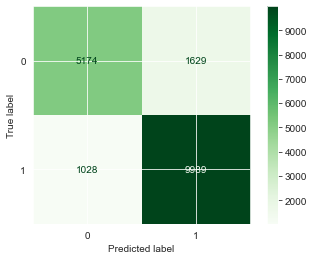

In [136]:
#plot_confusion_matrix
plot_confusion_matrix(rand_f, X_test, y_test,cmap='Greens')  
plt.show()


In [137]:
print (classification_report(y_test,y_pred_test, labels = list(set(y_test)),target_names =['non-functional','functional']))

                precision    recall  f1-score   support

non-functional       0.83      0.76      0.80      6803
    functional       0.86      0.91      0.88     11017

      accuracy                           0.85     17820
     macro avg       0.85      0.83      0.84     17820
  weighted avg       0.85      0.85      0.85     17820



In [138]:
scores = cross_val_score(rand_f, X, y, cv=5, scoring='roc_auc')
print(scores.mean())

0.9142785935016808


## Summary 

The confusion nmatrix shows that 1028 (false nagative)waterpoints were wrongly classified under having problems when they were functional.

1629 (false positive) waterpoints were classififed under functional when they were having problems

9939 (True Positive) waterpoints were classified under functional when they were functional

5174 (True Negative) waterpoints were classified under having problems when they were having problems


 F1 score penalizes models heavily if it skews too hard towards either precision or recall. For this reason, F1 score is generally the most used metric for describing the performance of a model. Random forest is our best model.

Our best model is Random forest classifier with an accuracy of 0.85

Best wells were made on 2000-2005

Around 9900 wells are functional and were predicted as functional

Different regions have different sources of water hence different functionality

#### Congratulations!!!